In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import utils


plt.rcParams['figure.figsize'] = [8, 6]
sns.set_theme(style="ticks", color_codes=True)
df = pd.read_csv('volby.csv', low_memory=False)
df = utils.rename_cols(df)

# Elections dataset report
## Initial information
### Objective
Estimate voter turnout per town, see whether it will be above/below region average

### Data
Contains information about voter attendance per town in the 2013 and 2017 elections. Contains votes per party and demographic data for each voting district.

Demographic data will be worthwhile to investigate, to see whether it correlates to voter turnout. Votes per party may also be a factor. Explore if voters of certain parties are more likely to attend and therefore towns leaning towards those parties are more likely to have higher attendance.

### Goal
Estimate voter attendance per town


## Data exploration
### Voter count and voter attendance
The country seems to be split up into voting districts that are mostly up to 1000 voters. Using the attendance data, we will explore other data points and evaluate the correlation.

In [2]:
attendances = ['attendance_13', 'attendance_17']
educ_levels_cols = [
    'Vzd_zakl_A', 'Vzd_str_be_A', 'Vzd_str_sm_A',
    'Vzd_nast_A', 'Vzd_vos_A', 'Vzd_vysok_A'
]
empl_states_cols = [
    'Eko_zam_A', 'Eko_post_p_A',
    'Eko_nezam_A', 'Nepracduch_A',
]
misc_cols =  [
    'Muzi_A', 'Zeny_A', 'Rodst_rozv_A',
    'Nar_romska_A', 'Nab_rimsko_A',
]
demographics_cols = educ_levels_cols + empl_states_cols + misc_cols

In [3]:
desc = df.describe().swapaxes(0, 1)
items = df.shape[0]
desc[desc['count']< items]

,count,mean,std,min,25%,50%,75%,max
Obec_okrsek_final2016,13660.0,1.629125e+07,2.058844e+07,5.000111e+06,5.492582e+06,5.709312e+06,5.969736e+06,5.998081e+07
PAR_2017_1_ODS,14745.0,3.871278e+01,3.624411e+01,0.000000e+00,1.000000e+01,2.900000e+01,5.700000e+01,4.310000e+02
PAR_2017_2,14745.0,5.911835e-01,1.254770e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.900000e+01
PAR_2017_3,14745.0,2.544591e-01,6.260785e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.000000e+00
PAR_2017_4_CSSD,14745.0,2.493204e+01,1.874933e+01,0.000000e+00,9.000000e+00,2.200000e+01,3.700000e+01,2.250000e+02
...,...,...,...,...,...,...,...,...
Nab_rimsko_A,14759.0,1.157348e+01,1.016100e+01,0.000000e+00,4.672897e+00,8.344924e+00,1.491525e+01,7.837838e+01
Eko_zam_A,14759.0,4.300815e+01,5.753903e+00,0.000000e+00,3.989899e+01,4.334239e+01,4.650192e+01,6.261607e+01
Eko_post_p_A,14759.0,5.896289e+00,2.248385e+00,0.000000e+00,4.357980e+00,5.649718e+00,7.174640e+00,2.631579e+01
Eko_nezam_A,14759.0,4.852644e+00,2.236066e+00,0.000000e+00,3.415779e+00,4.485981e+00,5.882353e+00,3.617907e+01


In [4]:
cols_to_delete = [
    'PAR_2017_CHYBA',
    'PAR_2017_OPRAVA',
    'CHYBA_KRAJ16',
    'PAR_2017_TYP_FORM',
    'Poc_budov'
]
df = df.drop(columns=cols_to_delete)
df = utils.make_attendance(df)

###Missing values
The dataset contains 13545 rows. Ignoring the columns that have been dropped, there are the following issues:

The following 5 rows appear largely incomplete and useless. Due to their low number, they can be safely dropped.

In [5]:
df[df['Muzi'].isna()]

,ID_N,OBEC,Nazev_obce,Okres_nazev,Kraj_nazev,Obec_okrsek_final2016,OBEC_Okrsek,PAR_2017_1_ODS,PAR_2017_2,PAR_2017_3,...,Vzd_str_sm_A,Vzd_str_be_A,Vzd_zakl_A,Nab_rimsko_A,Eko_zam_A,Eko_post_p_A,Eko_nezam_A,Nepracduch_A,attendance_13,attendance_17
1773,1774,539911,Příbram,Příbram,Středočeský kraj,53991139.0,539911_39,62.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.380952,73.649755
2101,2102,536032,Strýčice,České Budějovice,Jihočeský kraj,5360321.0,536032_1,2.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.000000,73.076923
3234,3235,553085,Skopytce,Tábor,Jihočeský kraj,5530852.0,553085_2,5.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.862069,87.719298
12384,12427,597180,Bruntál,Bruntál,Moravskoslezský kraj,59718019.0,597180_19,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.923077,34.246575
14219,14288,500208,Praha 8,Praha,Praha,NaN,500208_8091,146.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.090090,69.328358


In [6]:
df = df.drop(index=df[df['Muzi'].isna()].index)

In [7]:
na_df = df[df['ODEVZ_OBAL_KRAJ16'].isna()]
na_df[na_df.columns[na_df.isna().any()]]

,Obec_okrsek_final2016,VOL_SEZNAM_KRAJ16,VYD_OBALKY_KRAJ16,ODEVZ_OBAL_KRAJ16,PL_HL_CELK_KRAJ16,Ztracene_obalky_KRAJ16,Neplatne_KRAJ16,Vol_ucast_KRAJ16,PORIZ_OKR_KRAJ16,OKR_TIME_KRAJ16,PORIZ_TIME_KRAJ16
13660,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-99999.0,-99999.0,-99999.0
13661,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-99999.0,-99999.0,-99999.0
13662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-99999.0,-99999.0,-99999.0
13663,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-99999.0,-99999.0,-99999.0
13664,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-99999.0,-99999.0,-99999.0
...,...,...,...,...,...,...,...,...,...,...,...
14759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14760,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14761,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14762,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There are 1099 rows with missing data about the 2016 elections. This is not an insignificant number. Should the 2016 elections data be considered for the model, it would may be wise to correct these rows. If that isn't the case, the columns may be dropped.

In [8]:
voters_attendance = utils.init_row_df(['reg_voters', 'attendance'], 'year')
voters_attendance = utils.add_to_row_df(voters_attendance, df[['reg_voters_17', 'attendance_17']], 2017)
voters_attendance = utils.add_to_row_df(voters_attendance, df[['reg_voters_13', 'attendance_13']], 2013)

[Text(0.5, 1.0, 'Registered voters per voting district')]

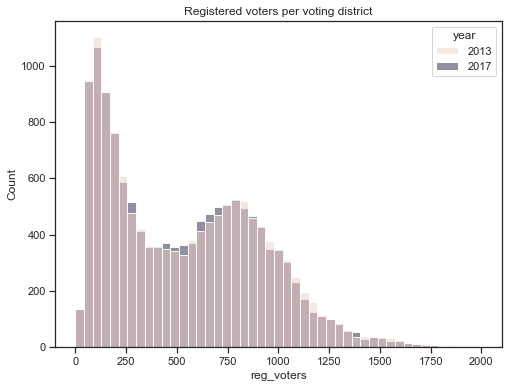

In [9]:
sns.histplot(data=voters_attendance , x='reg_voters', binrange=(0, 2000), hue='year')\
    .set(title='Registered voters per voting district')

Voter attendance seems to have a minor correlation with number of voters in the voting district.

Text(0.5, 0.98, 'Attendance and district size')

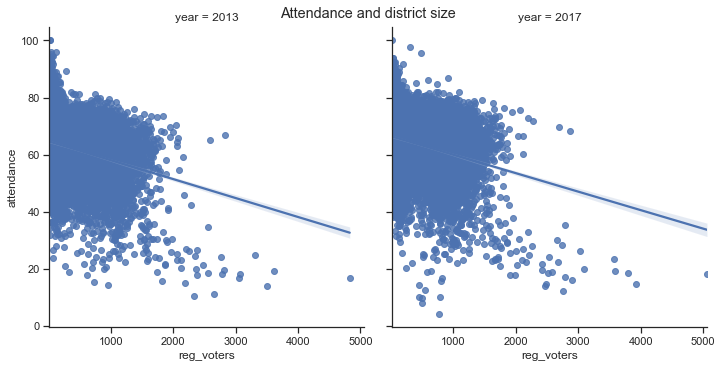

In [10]:
sns.lmplot(data=voters_attendance, x='reg_voters', y='attendance', col='year').fig.suptitle('Attendance and district size')

Attendance follows a normal distribution, as might be expected. It is notable that it increased in 2017.

[Text(0.5, 1.0, 'Voter attendance in districts')]

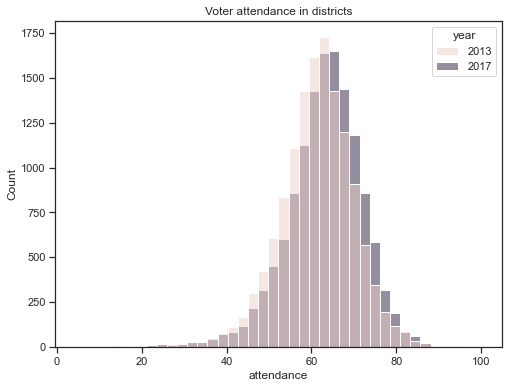

In [11]:
sns.histplot(voters_attendance, x='attendance', bins=40, hue='year').set(title='Voter attendance in districts')

In [12]:
df[['attendance_13', 'attendance_17']].describe()

,attendance_13,attendance_17
count,13540.000000,13540.000000
mean,61.091597,62.949046
std,9.034477,9.254552
min,10.636480,4.409857
25%,56.055706,58.032756
50%,61.617031,63.636364
75%,66.666667,68.876623
max,100.000000,100.000000


### Demographic data
The demographic data provided in the dataset are the following:
- Total population in the district
- Total men
- Total women
- Count of divorced
- Count of children up to 14 yrs
- Count of people 65+ yrs
- Gipsy population
- Count of people with university education (highest)
- Count of people with education level 5
- Count of people with education level 4
- Count of people with education level 3
- Count of people with education level 2
- Count of people with at most grammar school (lowest)
- Count of Roman Catholics
- Count of employed people - unretired
- Count of employed people - retired but working
- Count of unemployed people
- Count of retired not working people


#### Education data

This data shows the maximum reached level of education for the population. The levels are not cummulative

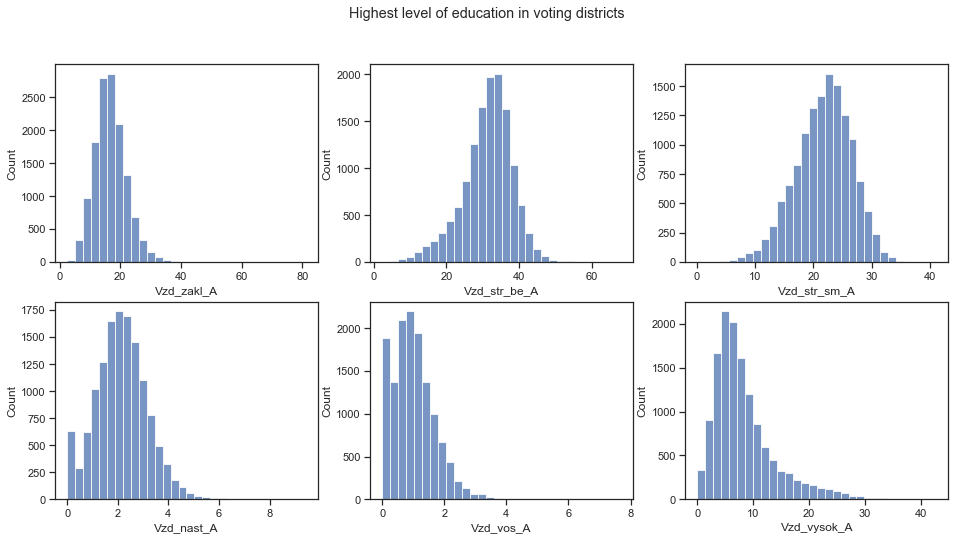

In [13]:
fig, ax = plt.subplots(2,3)
fig.set_size_inches(16, 8)
fig.suptitle('Highest level of education in voting districts')
for i, lvl in enumerate(educ_levels_cols):
    sns.histplot(data=df, x=lvl, bins=30, ax=ax[i//3, i%3])

##### Correlation between voter attendance and district education

[Text(0.5, 1.0, 'Correlation of attendance with education')]

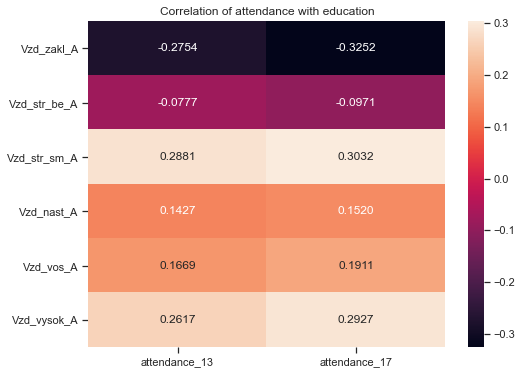

In [14]:
utils.make_heatmap(df, attendances, educ_levels_cols, 'Correlation of attendance with education')

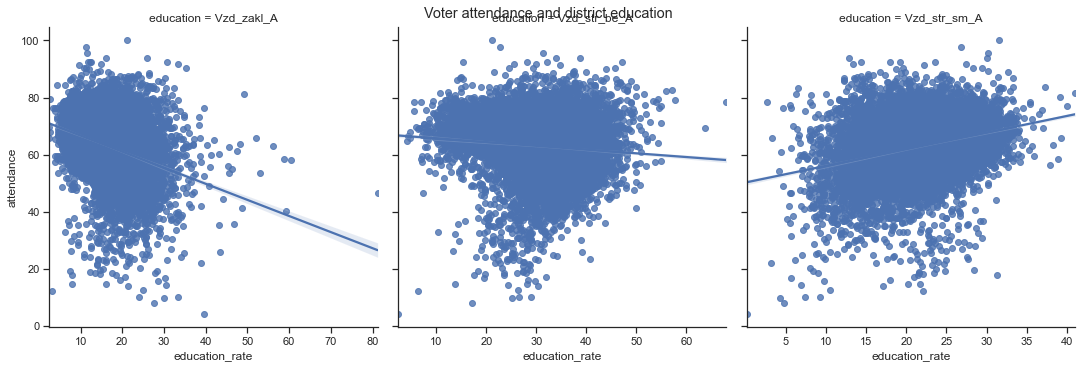

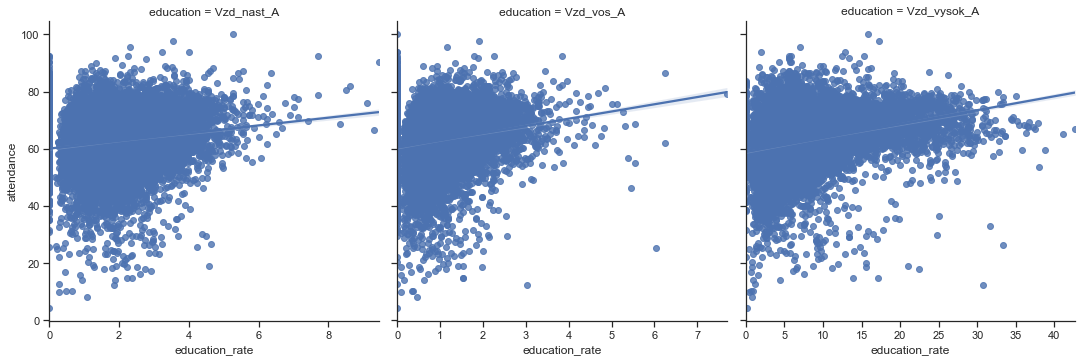

In [15]:
temp_df = utils.init_row_df(['attendance', 'education_rate'], 'education')
for lvl in educ_levels_cols[0:3]:
    temp_df = utils.add_to_row_df(temp_df, df[['attendance_17', lvl]], lvl)
sns.lmplot(data=temp_df, x='education_rate', y='attendance', col='education', sharex=False).fig.suptitle('Voter attendance and district education')

temp_df = utils.init_row_df(['attendance', 'education_rate'], 'education')
for lvl in educ_levels_cols[3:6]:
    temp_df = utils.add_to_row_df(temp_df, df[['attendance_17', lvl]], lvl)
sns.lmplot(data=temp_df, x='education_rate', y='attendance', col='education', sharex=False)

There definitely is a relationship between the education level of a voting district and the voter attendance and it is worthwile to investigate it. From an initial observation, it appears that districts in which a higher percentage of the population have a lower education level tend to vote less and districts with a more eduated population vote more.

### Emplyoment data

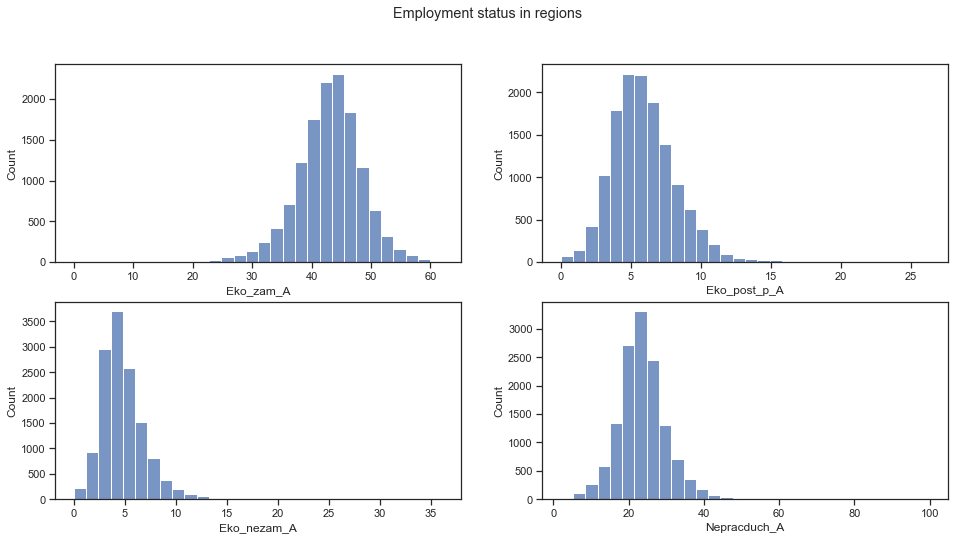

In [16]:
fig, ax = plt.subplots(2,2)
fig.set_size_inches(16, 8)
fig.suptitle('Employment status in regions')

for i, lvl in enumerate(empl_states_cols):
    sns.histplot(data=df, x=lvl, bins=30, ax=ax[i//2, i%2])

[Text(0.5, 1.0, 'Correlation of attendance with employment')]

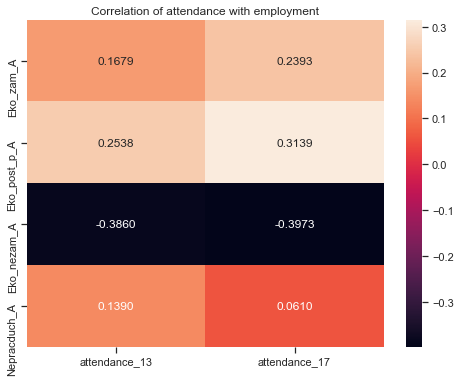

In [17]:
utils.make_heatmap(df, attendances, empl_states_cols, 'Correlation of attendance with employment')

Text(0.5, 0.98, 'Voter attendance and district education')

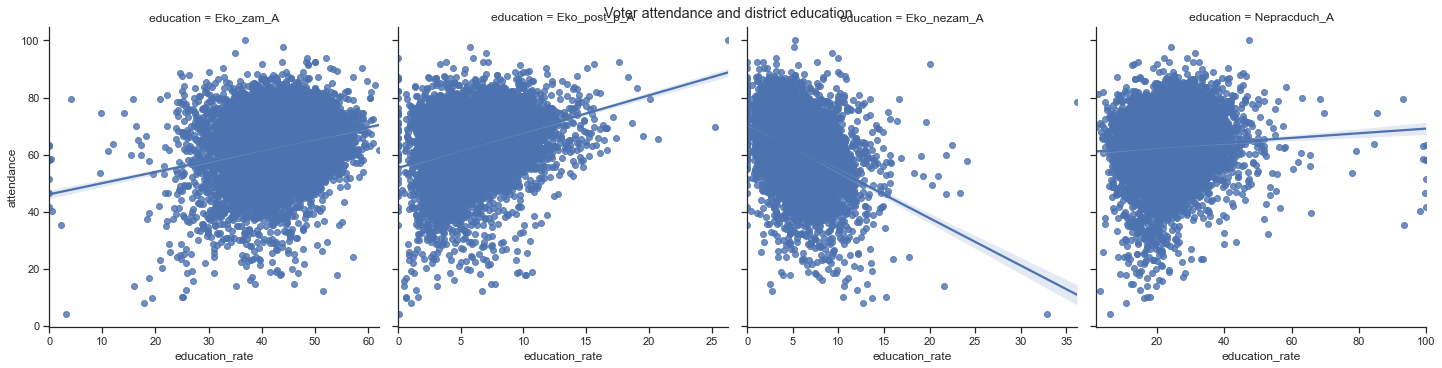

In [18]:
temp_df = utils.make_row_df(df, ['attendance', 'education_rate'], empl_states_cols, 'attendance_17', 'education')

sns.lmplot(data=temp_df, x='education_rate', y='attendance', col='education', sharex=False).fig.suptitle('Voter attendance and district education')

Whilist retirement is not correlated to voter attendance, the employment metric is worth investigating further.

### Age data
The age data available are people under 14 and over 65

[Text(0.5, 1.0, 'Correlation of attendance with ages')]

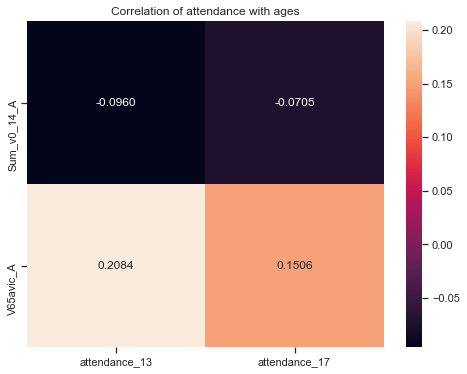

In [19]:
utils.make_heatmap(df, attendances, ['Sum_v0_14_A', 'V65avic_A'], 'Correlation of attendance with ages')

Althugh slightly more relevant than retirement data, the age data does not appear very important.

### Miscelaneous data
The remaining data columns are
- Population share - men
- Population share - women
- Gipsy population
- Population share of Roman Catholics
- Population share of divorced


[Text(0.5, 1.0, 'Correlation of attendance with remaining demographic data')]

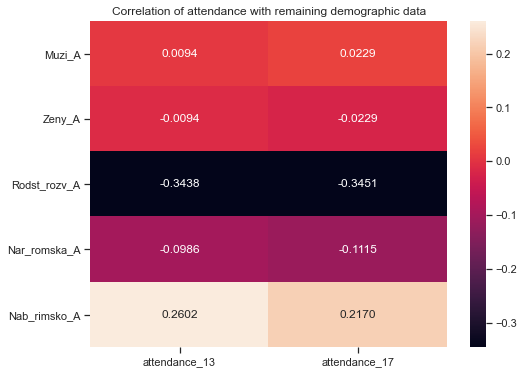

In [20]:
utils.make_heatmap(df, attendances, misc_cols, 'Correlation of attendance with remaining demographic data')

Gender data isn't useful to estimating voter turnout.  Divorce rates and catholics might be worth exploring.

[Text(0.5, 1.0, 'Correlation of attendances and demographic data')]

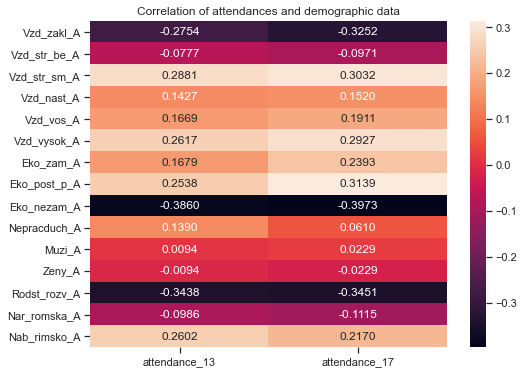

In [21]:
utils.make_heatmap(df, attendances, demographics_cols, 'Correlation of attendances and demographic data')

In [22]:
df[attendances + demographics_cols].describe().swapaxes(0, 1)

,count,mean,std,min,25%,50%,75%,max
attendance_13,13540.0,61.091597,9.034477,10.636480,56.055706,61.617031,66.666667,100.000000
attendance_17,13540.0,62.949046,9.254552,4.409857,58.032756,63.636364,68.876623,100.000000
Vzd_zakl_A,13540.0,16.716349,5.338931,2.471483,13.209187,16.279070,19.777144,81.180812
Vzd_str_be_A,13540.0,31.253283,6.863606,2.321429,27.518550,31.986420,35.702109,68.000000
Vzd_str_sm_A,13540.0,21.749741,4.832549,0.089286,18.649400,22.079734,25.132275,41.071429
Vzd_nast_A,13540.0,2.135877,1.041009,0.000000,1.461988,2.112895,2.777778,9.433962
Vzd_vos_A,13540.0,1.000544,0.701236,0.000000,0.529101,0.928923,1.388889,7.692308
Vzd_vysok_A,13540.0,8.321107,5.569299,0.000000,4.608295,6.881070,10.344828,42.717770
Eko_zam_A,13540.0,42.930708,5.660179,0.000000,39.857116,43.254413,46.425990,62.034514
Eko_post_p_A,13540.0,5.932302,2.290046,0.000000,4.356989,5.688676,7.236842,26.315789


<AxesSubplot:>

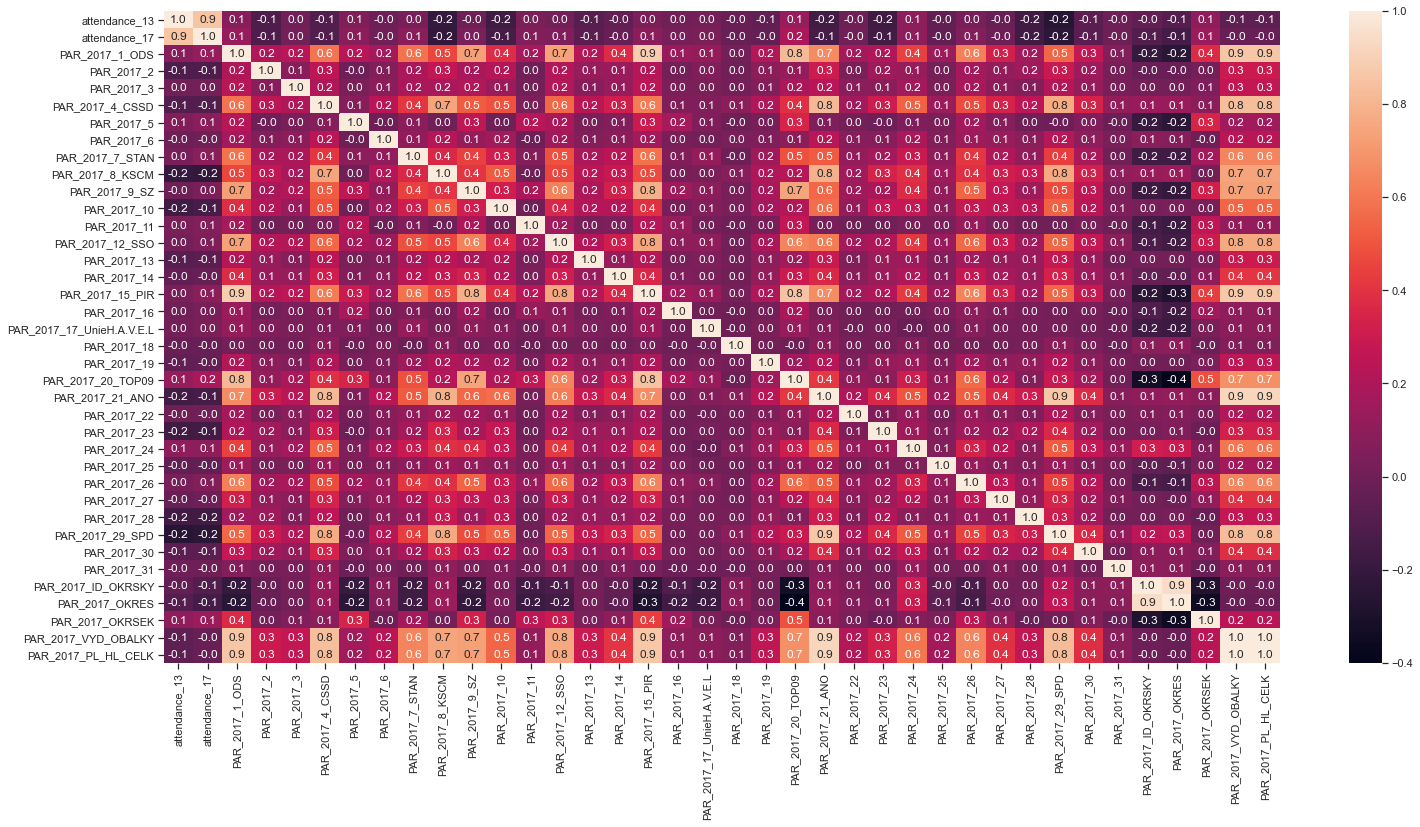

In [23]:
parties_cols = [col for col in df.columns if col.startswith('PAR_2017_')]

heatmap_cols = attendances + parties_cols
plt.figure(figsize=(25,12))
cr = df[heatmap_cols].corr()
sns.heatmap(data=cr, annot=True, fmt='.1f')